In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from commando import ComManDo

2021-10-20 12:17:07.274555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 12:17:07.274581: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
data_mod1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod1.h5ad')
data_mod2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_phase1/openproblems_bmmc_multiome_phase1.censor_dataset.output_mod2.h5ad')

In [3]:
samples = 500
# from commando.utilities import reduce_sample_data
# X1 = reduce_sample_data(data_mod1.X)[:samples]
# X2 = reduce_sample_data(data_mod2.X)[:samples]
X1 = data_mod1.X[:samples]
X2 = data_mod2.X[:samples]

# Run Mapping

In [4]:
commando_out = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=1000,
        two_step_num=10,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 13431)
Dataset 1: (500, 116490)
use device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
Calculating small F #1
epoch:[1000/2000] err:0.7841 alpha:0.9656
epoch:[2000/2000] err:0.7538 alpha:0.9753
Calculating small F #2
epoch:[1000/2000] err:0.8153 alpha:0.9672
epoch:[2000/2000] err:0.7796 alpha:0.9765
Calculating small F #3
epoch:[1000/2000] err:0.7913 alpha:0.9659
epoch:[2000/2000] err:0.7550 alpha:0.9757
Calculating small F #4
epoch:[1000/2000] err:0.7721 alpha:0.9655
epoch:[2000/2000] err:0.7481 alpha:0.9749
Calculating small F #5
epoch:[1000/2000] err:0.7889 alpha:0.9654
epoch:[2000/2000] err:0.7419 alpha:0.9759
Calculating small F #6
epoch:[1000/2000] err:0.7849 alpha:0.9658
epoch:[2000/2000] err:0.7441 alpha:0.9759
Calculating small F #7
epoch:[1000/2000] err:0.7837 alpha:0.9656
epoch:[2000/2000] err:0.7382 alpha:0.9761
Calculating small F #8
epoch:[1000/2000] err:0.8255 alpha:0.9

In [5]:
commando_out_no_optimization = (
    ComManDo(
        distance_mode='euclidean',
        epoch_pd=2000,
        log_pd=100,
    )
    .fit_transform([X1, X2])
)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 13431)
Dataset 1: (500, 116490)
use device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 1
epoch:[100/2000] err:2.4365 alpha:3.4330
epoch:[200/2000] err:0.3248 alpha:0.4663
epoch:[300/2000] err:0.4166 alpha:0.5995
epoch:[400/2000] err:0.4384 alpha:0.6395
epoch:[500/2000] err:0.4529 alpha:0.6720
epoch:[600/2000] err:0.4628 alpha:0.7004
epoch:[700/2000] err:0.4691 alpha:0.7260
epoch:[800/2000] err:0.4726 alpha:0.7494
epoch:[900/2000] err:0.4742 alpha:0.7709
epoch:[1000/2000] err:0.4742 alpha:0.7906
epoch:[1100/2000] err:0.4729 alpha:0.8086
epoch:[1200/2000] err:0.4704 alpha:0.8251
epoch:[1300/2000] err:0.4670 alpha:0.8403
epoch:[1400/2000] err:0.4627 alpha:0.8541
epoch:[1500/2000] err:0.4577 alpha:0.8667
epoch:[1600/2000] err:0.4523 alpha:0.8783
epoch:[1700/2000] err:0.4464 alpha:0.8888
epoch:[1800/2000] err:0.4404 alpha:0.8984
epoch:[1900/2000] err:0.4344 alpha:0.9072
epoch:[2000/2000] err

# Evaluate

ComManDo Optimized Pairwise Error: 0.3695436623653394
ComManDo Pairwise Error: 1.1949092639376717


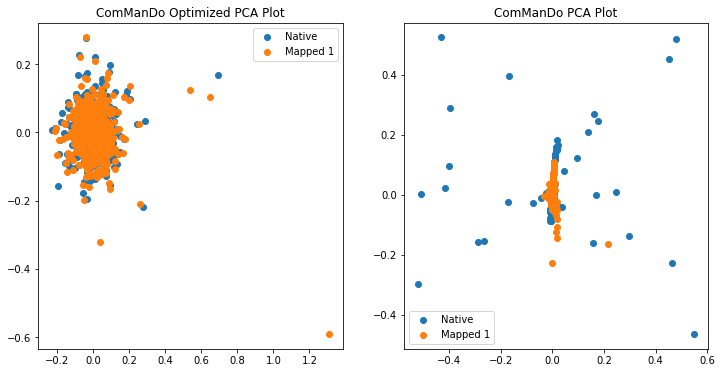

In [6]:
print('ComManDo Optimized Pairwise Error: ' + str(pairwise_error(*commando_out, normalize_by_feature=True)))
print('ComManDo Pairwise Error: ' + str(pairwise_error(*commando_out_no_optimization, normalize_by_feature=True)))

plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
alignment_visualize(*commando_out, alg_name='ComManDo Optimized')

plt.subplot(1, 2, 2)
alignment_visualize(*commando_out_no_optimization, alg_name='ComManDo')

# plt.subplot(1, 2, 2)
# plt.axis([-.1, .1, -.1, .1])
# alignment_visualize(*commando_out, alg_name='ComManDo (Zoomed)')